# Task 1

## Prediction using Supervised ML

#### Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
%matplotlib inline

#### Loading Data

In [2]:
csv_link='http://bit.ly/w-data'
csv=pd.read_csv(filepath_or_buffer=csv_link)

In [3]:
csv.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


#### Gathering Intel on the Data

In [4]:
csv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [5]:
csv.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


#### Plotting Data

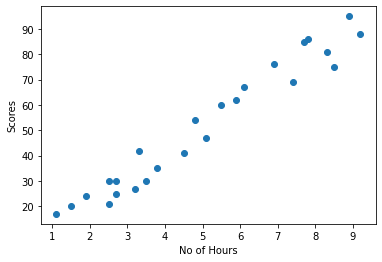

In [6]:
plt.scatter(csv["Hours"],csv["Scores"])
plt.xlabel("No of Hours")
plt.ylabel("Scores")
plt.show()

#### Splitting Data into Test and Train sets

In [7]:
def split_data(x,y,split_size=0.2,shuffle=True,seed=42):
    assert x.shape==y.shape
    train_x=[]
    train_y=[]
    test_x=[]
    test_y=[]
    
    np.random.seed(seed)
    length_data=len(x)
    indx=[i for i in range(length_data)]
    if shuffle==True:
        np.random.shuffle(indx)
        
    test_indx=indx[:int(length_data*split_size)]
    train_indx=indx[int(length_data*split_size):]
    
    for i in train_indx:
        train_x.append(x[i])
        train_y.append(y[i])
        
    for i in test_indx:
        test_x.append(x[i])
        test_y.append(y[i])
        
    return np.array(train_x),np.array(train_y),np.array(test_x),np.array(test_y)

In [8]:
x_vals=csv.iloc[:,0].values
y_vals=csv.iloc[:,1].values
x_train,y_train,x_test,y_test=split_data(x_vals,y_vals)

In [9]:
print("Shape of Train data: {},{}".format(x_train.shape,y_train.shape))
print("Shape of Test data: {},{}".format(x_test.shape,y_test.shape))


Shape of Train data: (20,),(20,)
Shape of Test data: (5,),(5,)


#### Preprocessing data

In [10]:
x_train=x_train.reshape(-1,1)
x_test=x_test.reshape(-1,1)
y_train=y_train.reshape(-1,1)
y_test=y_test.reshape(-1,1)

In [11]:
def pre_process(x):
    X=np.c_[np.ones((len(x),1)),x]
    return X

#### Fitting Data using Normal equation

In [12]:
def fit_eq(x,y):
    X_b=pre_process(x)
    theta=np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y_train)
    return theta

In [13]:
theta=fit_eq(x_train,y_train)
theta

array([[2.82689235],
       [9.68207815]])

In [14]:
print("Intercept: {}\nSlope: {}".format(theta[0],theta[1]))

Intercept: [2.82689235]
Slope: [9.68207815]


#### Predicting values on Test Data

In [15]:
y_pred=pre_process(x_test).dot(theta)

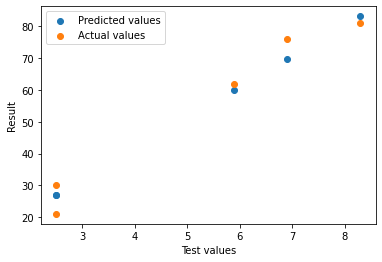

In [16]:
plt.scatter(x_test,y_pred,cmap='bo',label="Predicted values")
plt.scatter(x_test,y_test,cmap='r',label="Actual values")
plt.legend()
plt.xlabel("Test values")
plt.ylabel("Result")
plt.show()

#### Plotting Overall Result

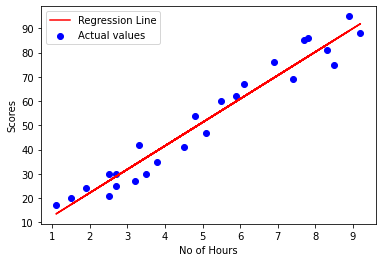

In [17]:
plt.scatter(x_vals,y_vals,c='b',label="Actual values")
plt.plot(x_vals,pre_process(x_vals.reshape(-1,1)).dot(theta),c='r',label="Regression Line")
plt.xlabel("No of Hours")
plt.ylabel("Scores")
plt.legend()
plt.show()

#### Predicting score if hours=9.25

In [18]:
hr=np.array([9.25])

In [19]:
hr_reshaped=hr.reshape(-1,1)

In [20]:
hr_reshaped.shape

(1, 1)

In [21]:
X_new_b=pre_process(hr)
y_predict=X_new_b.dot(theta)
print('Prediction on 9.25 hours of study: {}'.format(y_predict))

Prediction on 9.25 hours of study: [[92.38611528]]
